<a href="https://colab.research.google.com/github/Nikhil2374/Computer-Vision/blob/main/Perform%20histogram%20matching%20and%20specification%20on%20images..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

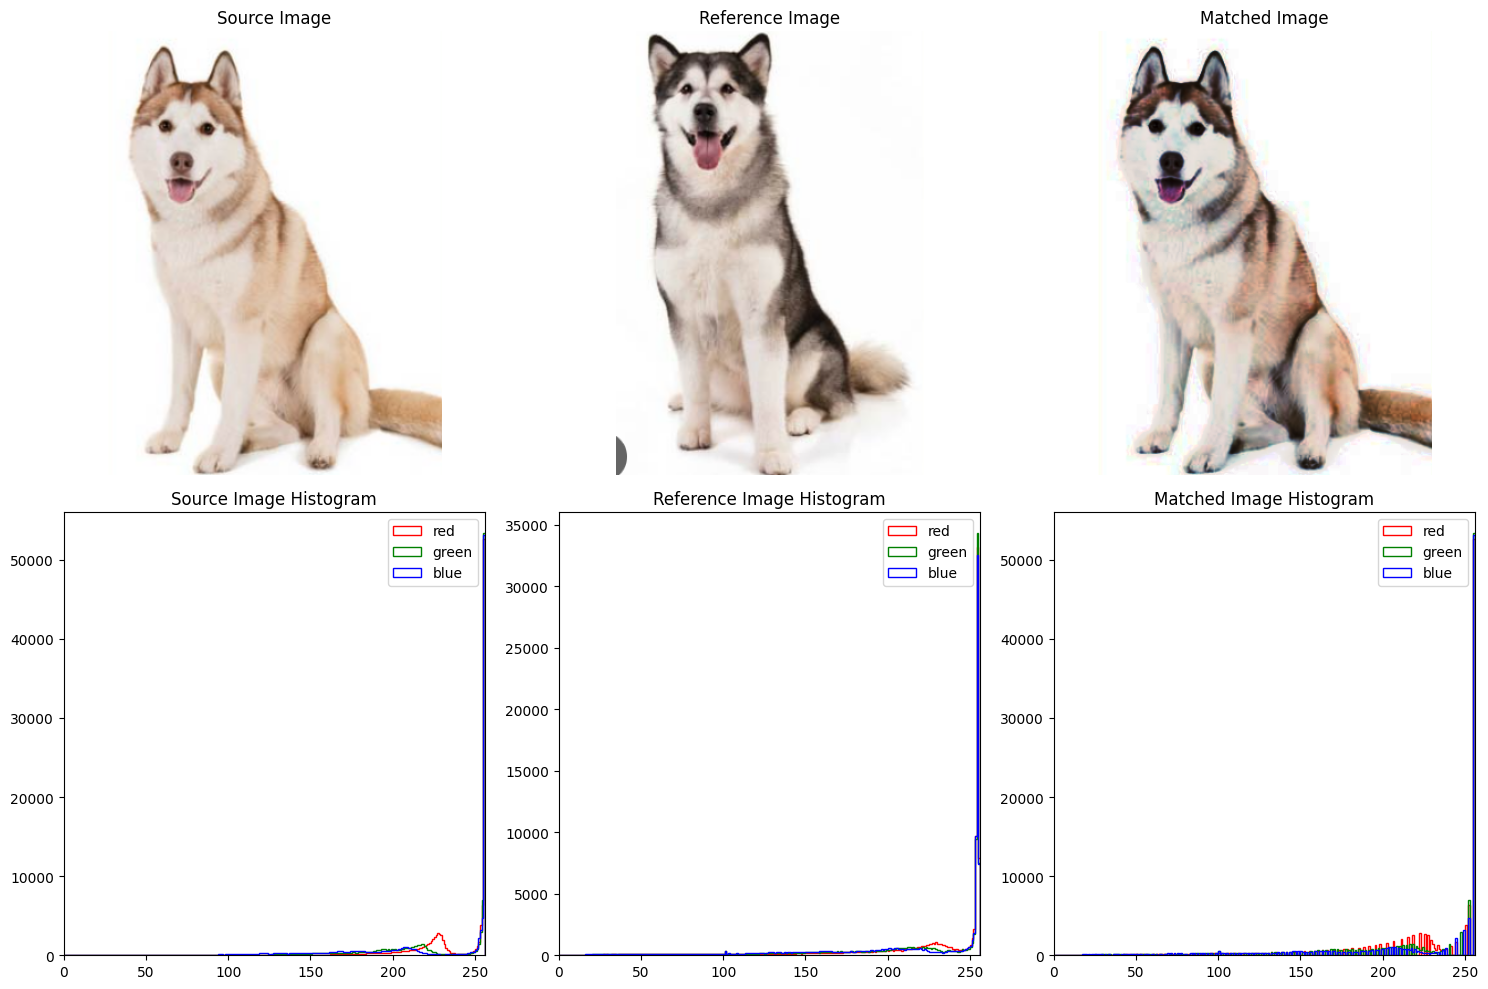

In [4]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

# Load the images
reference_img = cv2.imread('sample1.png', cv2.IMREAD_COLOR)
source_img= cv2.imread('sample2.png', cv2.IMREAD_COLOR)

# Convert the images to grayscale (optional)
source_img_rgb = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)

# Perform histogram matching
matched_img_rgb = exposure.match_histograms(source_img_rgb, reference_img_rgb, channel_axis=-1)

def plot_image_and_histogram_color(image, title, position):
    plt.subplot(2, 3, position)
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(2, 3, position + 3)
    colors = ('red', 'green', 'blue')
    for i, color in enumerate(colors):
        plt.hist(image[..., i].ravel(), bins=256, range=(0, 256), color=color, histtype='step', label=color)
    plt.title(f'{title} Histogram')
    plt.xlim([0, 256])
    plt.legend()

# Plot the images and their histograms
plt.figure(figsize=(15, 10))

plot_image_and_histogram_color(source_img_rgb, 'Source Image', 1)
plot_image_and_histogram_color(reference_img_rgb, 'Reference Image', 2)
plot_image_and_histogram_color(matched_img_rgb, 'Matched Image', 3)

plt.tight_layout()
plt.show()